In [1]:
#mount google drive when on google colaboratory

from google.colab import drive
drive.mount('/content/drive')

#set repo path and check repo status
repo_path = '/content/drive/MyDrive/geomsha/'
%cd /content/drive/MyDrive/geomsha/
!git status

Mounted at /content/drive
/content/drive/MyDrive/geomsha
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [1]:
#initialize environment, load modules/libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

In [2]:
loaded  = np.load('data/shapes.npz')
images = loaded['images']/255
labels = loaded['labels'][:,0].astype(int)-2

In [3]:
training = 0.9
len_train = int(training*len(images))

train_images = images[:len_train]
train_labels = labels[:len_train]
test_images = images[len_train:]
test_labels = labels[len_train:]

len_train = int(training*len(train_images))
val_images = train_images[len_train:]
val_labels = train_labels[len_train:]
train_images = train_images[:len_train]
train_labels = train_labels[:len_train]

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=images[0].shape),
  tf.keras.layers.Dense(500, activation='relu'),
  tf.keras.layers.Dense(400, activation='relu'),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

2022-12-04 15:03:46.572837: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 361)               0         
                                                                 
 dense (Dense)               (None, 500)               181000    
                                                                 
 dense_1 (Dense)             (None, 400)               200400    
                                                                 
 dense_2 (Dense)             (None, 200)               80200     
                                                                 
 dense_3 (Dense)             (None, 3)                 603       
                                                                 
Total params: 462,203
Trainable params: 462,203
Non-trainable params: 0
_________________________________________________________________


In [5]:
hist = model.fit(x=train_images, y=train_labels, epochs=50, batch_size=128,validation_data=(val_images, val_labels))

Epoch 1/50
633/633 [==============================] - 8s 11ms/step - loss: 0.7933 - accuracy: 0.5949 - val_loss: 0.5363 - val_accuracy: 0.7233
Epoch 2/50
633/633 [==============================] - 7s 10ms/step - loss: 0.4066 - accuracy: 0.8205 - val_loss: 0.4132 - val_accuracy: 0.8219
Epoch 3/50
633/633 [==============================] - 7s 10ms/step - loss: 0.2950 - accuracy: 0.8808 - val_loss: 0.2399 - val_accuracy: 0.9051
Epoch 4/50
633/633 [==============================] - 7s 11ms/step - loss: 0.2661 - accuracy: 0.8935 - val_loss: 0.3446 - val_accuracy: 0.8579
Epoch 5/50
633/633 [==============================] - 6s 10ms/step - loss: 0.2504 - accuracy: 0.9021 - val_loss: 0.2648 - val_accuracy: 0.8977
Epoch 6/50
633/633 [==============================] - 7s 10ms/step - loss: 0.2350 - accuracy: 0.9091 - val_loss: 0.2087 - val_accuracy: 0.9193
Epoch 7/50
633/633 [==============================] - 7s 10ms/step - loss: 0.2220 - accuracy: 0.9148 - val_loss: 0.2847 - val_accuracy: 0.8896

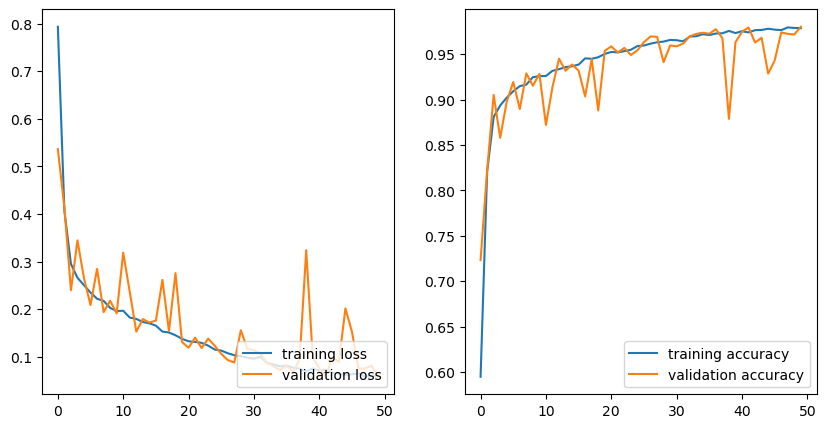

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

axs[0].plot(hist.epoch, hist.history['loss'])
axs[0].plot(hist.epoch, hist.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='lower right')

axs[1].plot(hist.epoch, hist.history['accuracy'])
axs[1].plot(hist.epoch, hist.history['val_accuracy'])
axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')

plt.show()

In [7]:
train_acc = model.evaluate(train_images, train_labels, batch_size=128)
test_acc= model.evaluate(test_images, test_labels, batch_size=128)

print("\ntraining accuracy : %.3f" % (train_acc[1]))
print("test accuracy : %.3f" % (test_acc[1]))

79/79 [==============================] - 0s 5ms/step - loss: 0.0607 - accuracy: 0.9805

training accuracy : 0.984
test accuracy : 0.980


In [8]:
def gen_grid_image(images, grid):
    img_size = len(images[0])
    num_grid = grid[0]*grid[1]

    grid_img = np.zeros((1+(img_size+1)*grid[0],1+(img_size+1)*grid[1]))
    grid_pos = []
    for i, img in enumerate(images[:num_grid]):
        x = i//grid[1]
        y = i%grid[1]
        grid_pos.append((x,y))
        grid_img[1+(img_size+1)*x:1+(img_size+1)*x+img_size,1+(img_size+1)*y:1+(img_size+1)*y+img_size] = img
    return (grid_img, grid_pos)

79/79 [==============================] - 1s 6ms/step

position : target -> fail : [circle, triangle, square]
(0, 0) : 1 -> 0 : [0.707 0.004 0.289]
(0, 1) : 2 -> 1 : [0.002 0.644 0.354]
(0, 2) : 0 -> 2 : [0.491 0.    0.509]
(0, 3) : 0 -> 2 : [0.243 0.    0.757]
(0, 4) : 1 -> 2 : [0.    0.019 0.981]
(1, 0) : 1 -> 0 : [0.756 0.238 0.006]
(1, 1) : 0 -> 2 : [0.354 0.004 0.643]
(1, 2) : 1 -> 2 : [0.263 0.001 0.736]
(1, 3) : 2 -> 0 : [0.585 0.    0.415]
(1, 4) : 2 -> 1 : [0.041 0.63  0.328]
(2, 0) : 0 -> 2 : [0.446 0.    0.554]
(2, 1) : 2 -> 0 : [0.565 0.    0.435]
(2, 2) : 2 -> 1 : [0.001 0.76  0.238]
(2, 3) : 0 -> 2 : [0.362 0.    0.638]
(2, 4) : 2 -> 1 : [0.    0.954 0.046]
(3, 0) : 1 -> 0 : [0.602 0.33  0.068]
(3, 1) : 2 -> 1 : [0.016 0.748 0.236]
(3, 2) : 0 -> 2 : [0.335 0.    0.665]
(3, 3) : 2 -> 1 : [0.    0.535 0.465]
(3, 4) : 2 -> 1 : [0.    0.995 0.005]


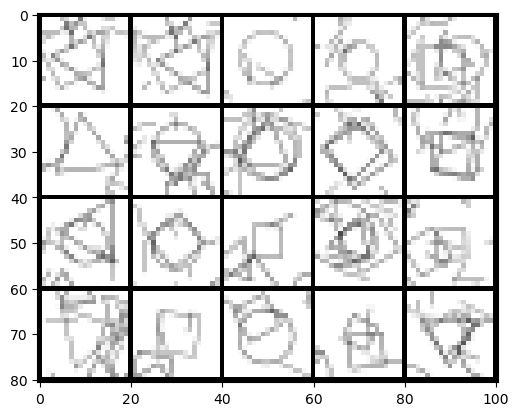

In [9]:
pred = model.predict(test_images, batch_size=128)
pred_labels = np.argmax(pred,1)

fail = np.not_equal(pred_labels,test_labels)
fail_images = test_images[fail]
target_labels = test_labels[fail]
fail_labels = pred_labels[fail]
fail_pred = pred[fail]

grid = (4,5)
grid_image, grid_pos = gen_grid_image(fail_images, grid)

fig = plt.figure(figsize=(grid_image.shape[1],grid_image.shape[0]),dpi=1)
fig.figimage(grid_image, cmap='gray')
fig.savefig('data/tmp_fails.png')
plt.close()

print("\nposition : target -> fail : [circle, triangle, square]")

np.set_printoptions(precision=3, suppress=True)
for i in range(grid[1]*grid[0]):
    print(f"{grid_pos[i]} : {target_labels[i]} -> {fail_labels[i]} : {fail_pred[i]}")

plt.imshow(mpimg.imread('data/tmp_fails.png'))


position : match : [circle, triangle, square]
(0, 0) : 2 : [0. 0. 1.]
(0, 1) : 1 : [0. 1. 0.]
(0, 2) : 0 : [1. 0. 0.]
(0, 3) : 2 : [0. 0. 1.]
(0, 4) : 2 : [0. 0. 1.]
(1, 0) : 2 : [0.027 0.004 0.969]
(1, 1) : 0 : [1. 0. 0.]
(1, 2) : 1 : [0.002 0.998 0.   ]
(1, 3) : 1 : [0.    0.681 0.319]
(1, 4) : 0 : [1. 0. 0.]
(2, 0) : 1 : [0. 1. 0.]
(2, 1) : 1 : [0.    0.999 0.001]
(2, 2) : 0 : [0.848 0.    0.152]
(2, 3) : 2 : [0. 0. 1.]
(2, 4) : 2 : [0.003 0.001 0.996]
(3, 0) : 0 : [1. 0. 0.]
(3, 1) : 0 : [1. 0. 0.]
(3, 2) : 0 : [0.988 0.    0.012]
(3, 3) : 2 : [0.001 0.    0.999]
(3, 4) : 0 : [1. 0. 0.]


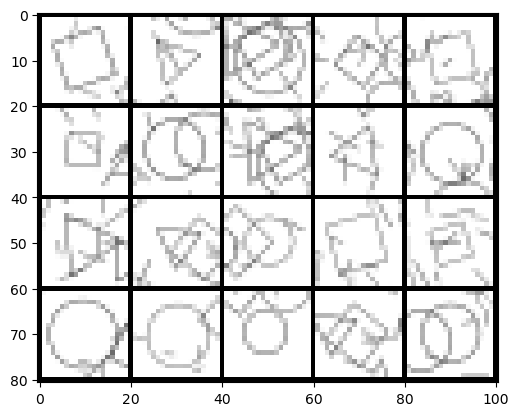

In [10]:
match = np.equal(pred_labels,test_labels)
hit_images = test_images[match]
hit_labels = pred_labels[match]
hit_pred = pred[match]

grid = (4,5)
grid_image, grid_pos = gen_grid_image(hit_images, grid)

fig = plt.figure(figsize=(grid_image.shape[1],grid_image.shape[0]),dpi=1)
fig.figimage(grid_image, cmap='gray')
fig.savefig('data/tmp_hits.png')
plt.close()

print("\nposition : match : [circle, triangle, square]")

np.set_printoptions(precision=3, suppress=True)
for i in range(grid[1]*grid[0]):
    print(f"{grid_pos[i]} : {hit_labels[i]} : {hit_pred[i]}")

plt.imshow(mpimg.imread('data/tmp_hits.png'))